# **КР1-Линейная регрессия**

### **Студент** : Озьяс Стев Икнэль Дани   ------  **Группа** : НКНбд-01-21



In [1]:
import tensorflow_datasets as tfds
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## **Задание 1**

Импортируем **tensorflow** и считаем из него набор данных **efron_morris75**:

In [2]:
import tensorflow_datasets as tfds

In [3]:
ds = tfds.load("efron_morris75", split='train')
df = tfds.as_dataframe(ds)
df.head()

,At-Bats,BattingAverage,FirstName,Hits,LastName,RemainingAt-Bats,RemainingAverage,SeasonAt-Bats,SeasonAverage,SeasonHits
0,45,0.289,b'Don',13,b'Kessinger',586,0.2645,631,0.266,168
1,45,0.178,b'Thurman',8,b'Munson',408,0.3162,453,0.302,137
2,45,0.222,b'George',10,b'Scott',435,0.3034,480,0.296,142
3,45,0.222,b'Billy',10,b'Williams',591,0.3299,636,0.251,205
4,45,0.311,b'Jim',14,b'Spencer',466,0.2704,511,0.274,140


Оставим в наборе данных только признаки, принимающие непрепрывные числовые значения, включая нашу независимую переменную **SeasonAverage** и зависимую переменную **SeasonHits**

In [4]:
for col in list(df.columns):
  if type(df[col][0]) is bytes:
    df.drop(columns=col,inplace=True)


df.head()

,At-Bats,BattingAverage,Hits,RemainingAt-Bats,RemainingAverage,SeasonAt-Bats,SeasonAverage,SeasonHits
0,45,0.289,13,586,0.2645,631,0.266,168
1,45,0.178,8,408,0.3162,453,0.302,137
2,45,0.222,10,435,0.3034,480,0.296,142
3,45,0.222,10,591,0.3299,636,0.251,205
4,45,0.311,14,466,0.2704,511,0.274,140


Вычислим матрицу корреляции переменных

In [5]:
corr_matrix = df.corr()
corr_matrix

,At-Bats,BattingAverage,Hits,RemainingAt-Bats,RemainingAverage,SeasonAt-Bats,SeasonAverage,SeasonHits
At-Bats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BattingAverage,NaN,1.000000,0.999992,0.181551,0.261038,0.181551,0.534403,0.236011
Hits,NaN,0.999992,1.000000,0.182128,0.261291,0.182128,0.534554,0.236407
RemainingAt-Bats,NaN,0.181551,0.182128,1.000000,0.676056,1.000000,0.569706,0.972668
RemainingAverage,NaN,0.261038,0.261291,0.676056,1.000000,0.676056,0.865239,0.816202
SeasonAt-Bats,NaN,0.181551,0.182128,1.000000,0.676056,1.000000,0.569706,0.972668
SeasonAverage,NaN,0.534403,0.534554,0.569706,0.865239,0.569706,1.000000,0.674085
SeasonHits,NaN,0.236011,0.236407,0.972668,0.816202,0.972668,0.674085,1.000000


Выводим названия (номера) пар переменных с наиболее низкой и высокой корреляцией

In [6]:
import numpy as np


min_corr = (corr_matrix.min(axis=1)).min(axis=0)

max_corr = (corr_matrix.max(axis=1)).max(axis=0)

print("Minimal correlation found in matrix: ", min_corr)
print("Maximal correlation found in matrix: ", max_corr, '\n')

min_row, min_col= np.where(corr_matrix == min_corr)
max_row, max_col= np.where(corr_matrix == max_corr)


COL = list(corr_matrix.columns)
ROW = list(corr_matrix.index)


print("COUPLES WITH MINIMAL CORRELATION")
for i in range(len(min_row)):
  print((min_row[i], min_col[i]), "----->", (ROW[min_row[i]], COL[min_col[i]]), " = ", min_corr)

print('\n')

print("COUPLES WITH MAXIMAL CORRELATION")
for i in range(len(max_row)):
  print((max_row[i], max_col[i]), "----->", (ROW[max_row[i]], COL[max_col[i]]), " = ", max_corr)

print("This was expected, since the correlation of any variable with itself is 1.", '\n')

print("If we are considering couple with DISTINCT variables, then the couple with maximal correlation would be:")
print((1, 2), "----->", (ROW[1], COL[2]), " = ", corr_matrix.iat[1, 2], '\n')

Minimal correlation found in matrix:  0.18155143066976118
Maximal correlation found in matrix:  1.0 

COUPLES WITH MINIMAL CORRELATION
(1, 3) -----> ('BattingAverage', 'RemainingAt-Bats')  =  0.18155143066976118
(3, 1) -----> ('RemainingAt-Bats', 'BattingAverage')  =  0.18155143066976118


COUPLES WITH MAXIMAL CORRELATION
(1, 1) -----> ('BattingAverage', 'BattingAverage')  =  1.0
(2, 2) -----> ('Hits', 'Hits')  =  1.0
(3, 3) -----> ('RemainingAt-Bats', 'RemainingAt-Bats')  =  1.0
(4, 4) -----> ('RemainingAverage', 'RemainingAverage')  =  1.0
(5, 5) -----> ('SeasonAt-Bats', 'SeasonAt-Bats')  =  1.0
(6, 6) -----> ('SeasonAverage', 'SeasonAverage')  =  1.0
(7, 7) -----> ('SeasonHits', 'SeasonHits')  =  1.0
This was expected, since the correlation of any variable with itself is 1. 

If we are considering couple with DISTINCT variables, then the couple with maximal correlation would be:
(1, 2) -----> ('BattingAverage', 'Hits')  =  0.9999918328224731 



## **Задание 2**

### Визуализация независимой **SeasonAverage** и зависимой **SeasonHits** пременных

Визуализация для независимой переменной – эмпирическая функция распределения

In [7]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [8]:
samples = df['SeasonAverage']
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

In [9]:
import pandas as pd

df_ECDF = pd.DataFrame(ylist, columns=['SeasonAverage'],index=xlist)
df_ECDF


,SeasonAverage
0.183000,0.055556
0.183338,0.055556
0.183676,0.055556
0.184014,0.055556
0.184352,0.055556
...,...
0.350310,0.944444
0.350648,0.944444
0.350986,0.944444
0.351324,0.944444


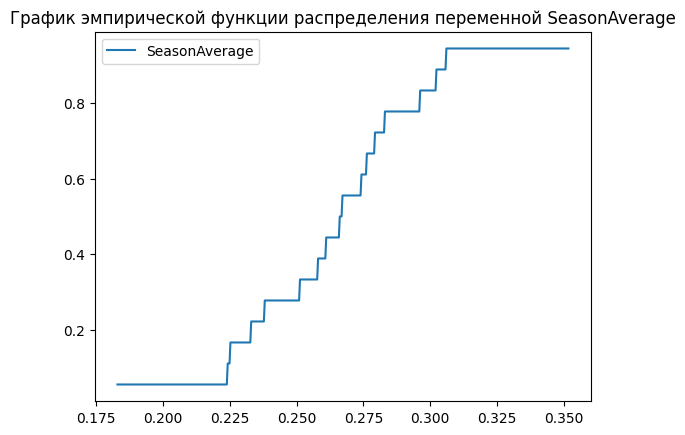

In [10]:
df_ECDF.plot.line(title='График эмпирической функции распределения переменной SeasonAverage');

Визуализация для зависимой переменной – диаграмма размаха

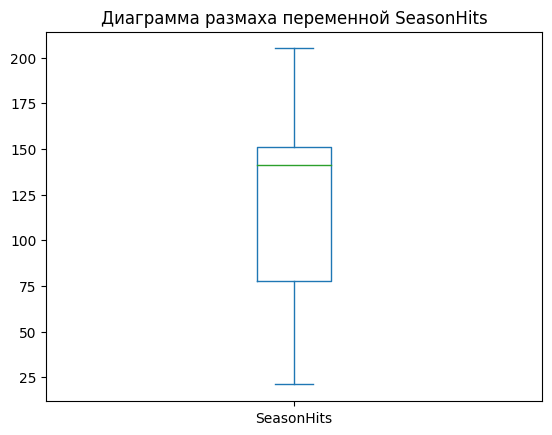

In [11]:
df['SeasonHits'].plot.box(title='Диаграмма размаха переменной SeasonHits');

## **Задание 3**

### Диаграмма рассеяния переменных SeasonAverage и SeasonHits

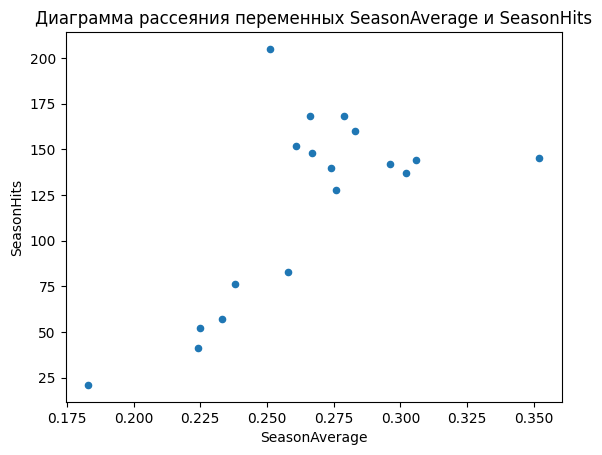

In [12]:
df.plot.scatter('SeasonAverage','SeasonHits',title='Диаграмма рассеяния переменных SeasonAverage и SeasonHits');

Очистим набор от точек, одиноко расположенных при помощи булева индексирования.

In [13]:
import matplotlib.pyplot as plt

x = df['SeasonAverage']
y = df['SeasonHits']

np.max(y)

205

In [14]:
x = x[y < np.max(y)]    #remove the point on the top
y = y[y < np.max(y)]

x.shape, y.shape

((17,), (17,))

In [15]:
np.max(x)

0.352

In [16]:
y = y[x < np.max(x)]    #remove the point on the right
x = x[x < np.max(x)]

x.shape, y.shape

((16,), (16,))

In [17]:
np.min(x)

0.183

In [18]:
y = y[x > np.min(x)]      #remove the point on the left
x = x[x > np.min(x)]

x.shape, y.shape

((15,), (15,))

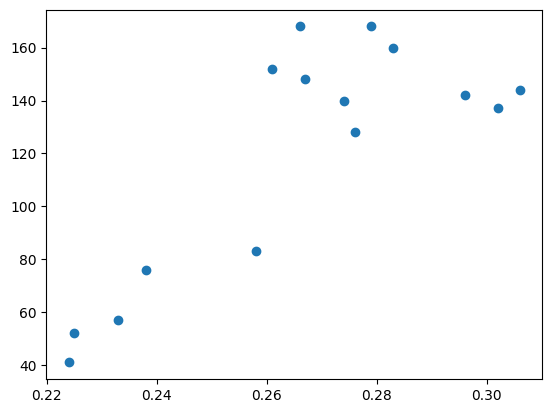

In [19]:
plt.scatter(x, y);

## **Задание 4**

### Точный подход для построения парной линейной регрессии

Вычислим математические ожидания переменных (признаков) $x$ и $y$:

In [20]:
x_mean = np.mean(x)
y_mean = np.mean(y)

и далее коэффициенты регрессии и смещения:

In [21]:
a = (x - x_mean).dot(y - y_mean) / (x - x_mean).dot(x - x_mean)
b = y_mean - a * x_mean

Прогнозируемые значения зависимой переменной вычисляются при помощи полученных коэффициентов так:

In [22]:
y_hat = a * x + b
y_hat

0     119.914597
1     168.850662
2     160.694687
4     130.789291
5     109.039902
6     137.585983
7     133.507950
8     113.117935
11    121.273941
12     81.853226
13    174.288010
14     75.056534
15     62.822525
16     64.181839
17    143.023300
Name: SeasonAverage, dtype: float32

Построим на рисунке точки набора данных и точную линию регрессии:

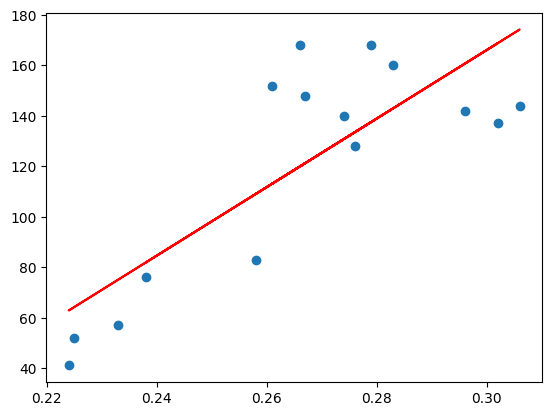

In [23]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')

### Подход построения парной линейной регрессии при помощи нейронной сети

Рассмотрим задачу регрессии для нашего набора с использованием средств __Tensorflow__.

Для этого создадим с использованием средств модуля __Keras__ модель простейшей нейронной сети из одного слоя с одним нейроном:

In [24]:
import tensorflow as tf

In [25]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ])

In [26]:
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

In [27]:
x_train, x_test = x[:9], x[9:]  #train = 70%   test=30%
y_train, y_test = y[:9], y[9:]

model.fit(x_train, y_train, epochs=1000) # verbose=0

Epoch 1/1000
1/1 [==============================] - 1s 533ms/step - loss: 140.7758 - mean_absolute_error: 140.7758
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 140.4569 - mean_absolute_error: 140.4569
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 140.1380 - mean_absolute_error: 140.1380
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 139.8192 - mean_absolute_error: 139.8192
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 139.5003 - mean_absolute_error: 139.5003
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 139.1815 - mean_absolute_error: 139.1815
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 138.8626 - mean_absolute_error: 138.8626
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 138.5438 - mean_absolute_error: 138.5438
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 138.2249 - mea

In [28]:
y_predict1 = a*x_test + b

l1 = r2_score(y_test, y_predict1)

y_predict2 = model.predict(x_test)
l2 = r2_score(y_test, y_predict2)

print("В случае точного подхода R^2 = ",l1)
print("В случае нейронной сети R^2 = ",l2)

1/1 [==============================] - 0s 435ms/step
В случае точного подхода R^2 =  0.8305797930233862
В случае нейронной сети R^2 =  -0.9950825559163685


**Здесь очевидно, что точный подход - лучший способ для определения парной линейной регрессии. Его коеффицент детерминации ближе к 1.**

## **Задание 5**

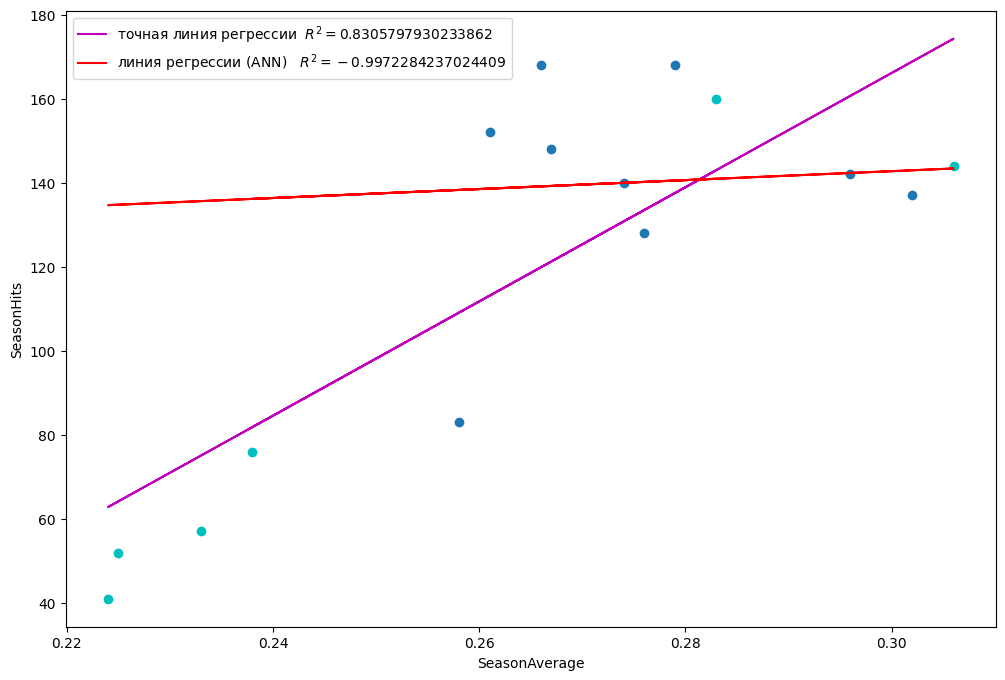

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='c')
plt.plot(x_test, y_predict1, c='m', label='точная линия регрессии  $R^2 = 0.8305797930233862$')
plt.plot(x_test, y_predict2, c='r', label='линия регрессии (ANN)   $R^2 = -0.9972284237024409$')
plt.xlabel("SeasonAverage") # ось абсцисс
plt.ylabel("SeasonHits") # ось ординат
plt.legend();

## **Задание 6**

Разбем набор признаков на обучающую и контрольную выборки

In [30]:
X = df.drop(columns=['SeasonHits'])

Y = df['SeasonHits']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Создаем и адаптируем нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака)

In [31]:
normalizer = tf.keras.layers.Normalization()

In [32]:
df_train = pd.DataFrame(X_train)
df_normalizer = tf.keras.layers.Normalization()
df_normalizer.adapt(df_train)

print(df_normalizer.mean.numpy())
print(df_normalizer.variance.numpy())

[[4.5000000e+01 2.6821426e-01 1.2071428e+01 3.5428571e+02 2.5927860e-01
  3.9928571e+02 2.6014283e-01]]
[[0.0000000e+00 4.4054543e-03 8.9234686e+00 2.5075062e+04 1.4875799e-03
  2.5075062e+04 1.4972651e-03]]


Нормализуем зависимый признак **SeasonHits**



In [33]:
Y_s = (Y - Y.mean()) / Y.std()
Y_s

0     0.919121
1     0.320674
2     0.417197
3     1.633398
4     0.378588
5    -0.721784
6     0.919121
7     0.146931
8     0.610245
9    -1.918679
10    0.475112
11    0.533026
12   -0.856917
13    0.455807
14   -1.223708
15   -1.532584
16   -1.320231
17    0.764683
Name: SeasonHits, dtype: float64

## **Задание 7**

Используя созданный нормализующий слой и нормализованный зависимый признак, построим регресоры на базе следующих моделей множественной регрессии:

In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

**Линейная регрессия**

In [35]:
linear_model = tf.keras.Sequential([
    df_normalizer,
    tf.keras.layers.Dense(units=1)
])

linear_model.predict(df_train)

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')


1/1 [==============================] - 0s 390ms/step


In [36]:
%%time
history = linear_model.fit(
    df_train, Y_train,
    epochs=1000,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 32.7 s, sys: 1.15 s, total: 33.9 s
Wall time: 40.9 s


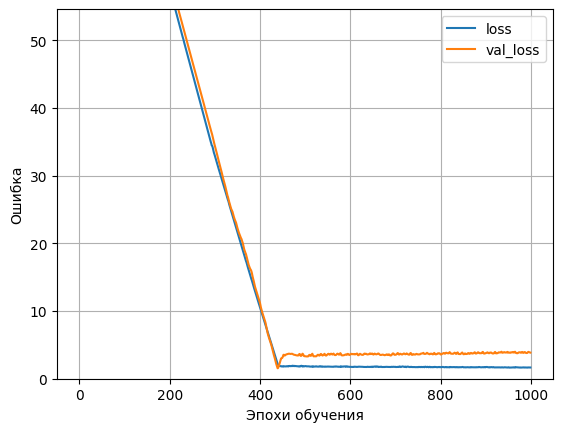

In [37]:
plot_loss(history)

**Лассо регрессия (L1)**

In [38]:
l1_model = tf.keras.Sequential([
    df_normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])


l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')


In [39]:
%%time
history = l1_model.fit(
    df_train, Y_train,
    epochs=1000,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 31.2 s, sys: 1.14 s, total: 32.4 s
Wall time: 41.4 s


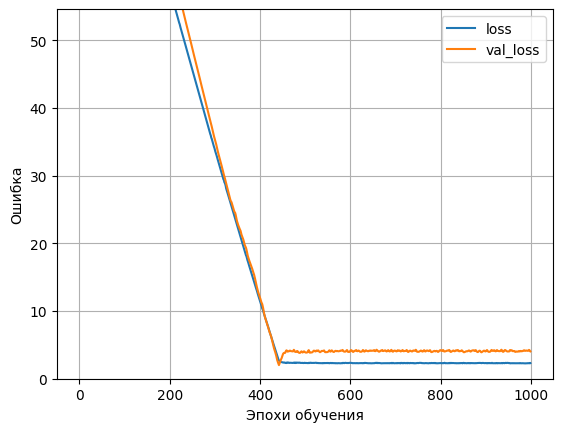

In [40]:
plot_loss(history)

**Гребневая регрессия (L2)**

In [41]:
l2_model = tf.keras.Sequential([
    df_normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])


l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')


In [42]:
%%time
history = l2_model.fit(
    df_train, Y_train,
    epochs=1000,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)


CPU times: user 31.5 s, sys: 1.05 s, total: 32.6 s
Wall time: 41.4 s


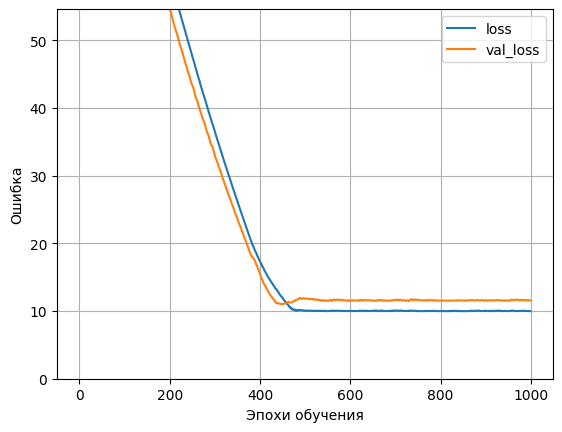

In [43]:
plot_loss(history)

## **Задание 8**

Определим на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю MAE

In [44]:
Y_pred = linear_model.predict(X_test)
Y_pred1 = l1_model.predict(X_test)
Y_pred2 = l2_model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 69ms/step


Считаем показатель качества регрессии (MAE) для всех трех моделей

In [45]:
print("MAE_Lin = ", mean_absolute_error(Y_test, Y_pred))

MAE_Lin =  4.123023986816406


In [46]:
print("MAE_L1 = ", mean_absolute_error(Y_test, Y_pred1))

MAE_L1 =  6.345340728759766


In [47]:
print("MAE_L2 = ", mean_absolute_error(Y_test, Y_pred2))

MAE_L2 =  8.857025146484375


Оказалось, что моделью множественной регрессии с наиболее высоким качеством по показателю MAE является **модель гребневой регрессии (L2)**

## **Задание 9**

Для лучшего регрессора (L2) визуализируем кривые обучения (в зависимости от эпохи обучения).
Кривые обучения получаются такими:

,loss,val_loss
0,109.194489,102.169220
1,108.914543,102.008766
2,108.640892,101.855072
3,108.372200,101.705727
4,108.107277,101.556587
...,...,...
995,9.986014,11.566830
996,9.980431,11.538575
997,9.984568,11.521522
998,10.005875,11.545524


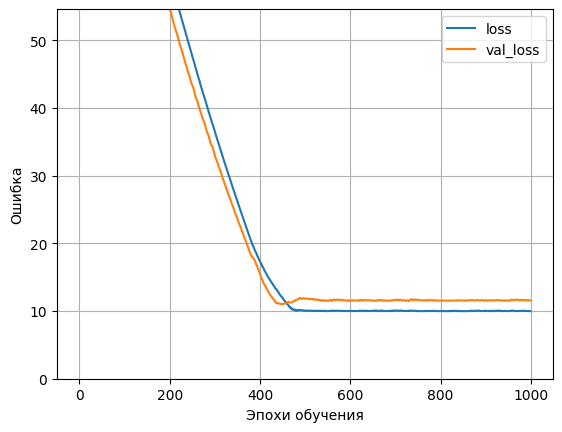

In [48]:
plot_loss(history)

hist = pd.DataFrame(history.history)
hist

## **Задание 10**

Определим медианные значения признаков (кроме независимого и зависимого признаков)

In [49]:
Median = df.drop(columns=['SeasonAverage', 'SeasonHits']).median()

Median

At-Bats              45.0000
BattingAverage        0.2440
Hits                 11.0000
RemainingAt-Bats    422.0000
RemainingAverage      0.2695
SeasonAt-Bats       467.0000
dtype: float64

 Визуализируем на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [50]:
y_pred = linear_model.predict(X_test['SeasonAverage'])

1/1 [==============================] - 0s 56ms/step


In [51]:
y_pred1 = l1_model.predict(X_test['SeasonAverage'])

1/1 [==============================] - 0s 64ms/step


In [52]:
y_pred2 = l2_model.predict(X_test['SeasonAverage'])

1/1 [==============================] - 0s 57ms/step


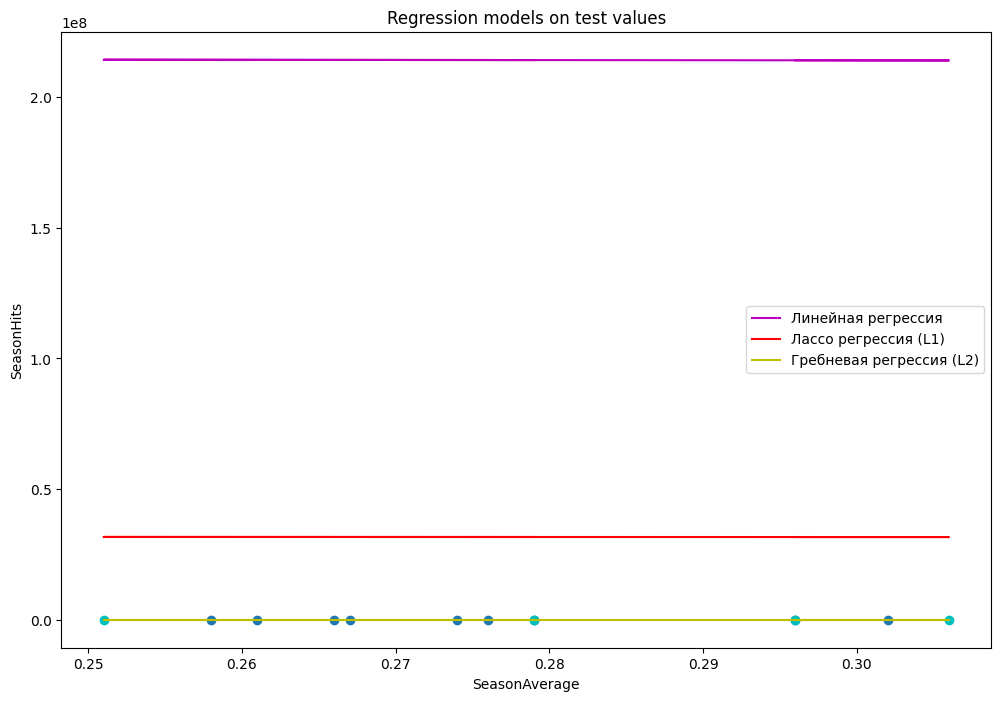

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train)
plt.scatter(X_test['SeasonAverage'], Y_test, c='c')
plt.plot(X_test['SeasonAverage'], y_pred, c='m', label='Линейная регрессия')
plt.plot(X_test['SeasonAverage'], y_pred1, c='r', label='Лассо регрессия (L1)')
plt.plot(X_test['SeasonAverage'], y_pred2, c='y', label='Гребневая регрессия (L2)')
plt.xlabel("SeasonAverage") # ось абсцисс
plt.ylabel("SeasonHits") # ось ординат
plt.legend()
plt.title("Regression models on test values");